In [25]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import apriori
from textblob import TextBlob
import networkx as nx

In [28]:
%matplotlib notebook

In [3]:
data = pd.read_csv('sciencedirect_test.csv')

In [59]:
data.head()

,Unnamed: 0,article_name,article_type,author,journal,time,key_words,year
0,0,Connecting membranes to the actin cytoskeleton,Review article,Patrick J Hussey,Current Opinion in Plant Biology,December 2017,"[membrane, actin, cytoskeleton]",2017
1,1,Regulation of the Plasma Membrane Calcium ATPa...,Short communication,Juan Pablo Rossi,Biochemical and Biophysical Research Communica...,Available online 24 November 2017,"[regulation, plasma, membrane, calcium, atpase...",2017
2,2,Super-Resolution Microscopy Reveals the Native...,Open access,Ke Xu,Cell Reports,30 January 2018,"[super-resolution, microscopy, ultrastructure,...",2018
3,3,Cytoskeleton dynamics in axon regeneration,Open access,Frank Bradke,Current Opinion in Neurobiology,August 2018,"[cytoskeleton, dynamic, regeneration]",2018
4,4,Effect of liquid helium vitrification on cytos...,Research article,Ying Hua Li,Animal Reproduction Science,December 2017,"[effect, liquid, helium, vitrification, cytosk...",2017


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
Unnamed: 0      250 non-null int64
article_name    250 non-null object
article_type    250 non-null object
author          250 non-null object
journal         250 non-null object
time            248 non-null object
dtypes: int64(1), object(5)
memory usage: 11.8+ KB


In [6]:
f = lambda x: unicode(x, 'utf-8')
data['article_name'] = data['article_name'].map(f)

In [7]:
def take_key_words(data):
    key_words = []
    for i in range(data.shape[0]):
        tagged = TextBlob(data[i]).tags
        is_noun = lambda pos: pos[:2] == 'NN'
        nouns = [word.singularize().lower() for (word, pos) in tagged if is_noun(pos)]
        key_words.append(nouns)
    return key_words

In [8]:
key_word = take_key_words(data['article_name'])
data['key_words'] = key_word
data.head()

,Unnamed: 0,article_name,article_type,author,journal,time,key_words
0,0,Connecting membranes to the actin cytoskeleton,Review article,Patrick J Hussey,Current Opinion in Plant Biology,December 2017,"[membrane, actin, cytoskeleton]"
1,1,Regulation of the Plasma Membrane Calcium ATPa...,Short communication,Juan Pablo Rossi,Biochemical and Biophysical Research Communica...,Available online 24 November 2017,"[regulation, plasma, membrane, calcium, atpase..."
2,2,Super-Resolution Microscopy Reveals the Native...,Open access,Ke Xu,Cell Reports,30 January 2018,"[super-resolution, microscopy, ultrastructure,..."
3,3,Cytoskeleton dynamics in axon regeneration,Open access,Frank Bradke,Current Opinion in Neurobiology,August 2018,"[cytoskeleton, dynamic, regeneration]"
4,4,Effect of liquid helium vitrification on cytos...,Research article,Ying Hua Li,Animal Reproduction Science,December 2017,"[effect, liquid, helium, vitrification, cytosk..."


In [9]:
data = data.fillna(value = '11111')
data.shape

(250, 7)

In [11]:
# extract the year of published article
n = data.shape[0]
year = []
for i in range(n):
    year.append(data['time'][i][-4:])
#print year
data['year'] = year
data.head()

,Unnamed: 0,article_name,article_type,author,journal,time,key_words,year
0,0,Connecting membranes to the actin cytoskeleton,Review article,Patrick J Hussey,Current Opinion in Plant Biology,December 2017,"[membrane, actin, cytoskeleton]",2017
1,1,Regulation of the Plasma Membrane Calcium ATPa...,Short communication,Juan Pablo Rossi,Biochemical and Biophysical Research Communica...,Available online 24 November 2017,"[regulation, plasma, membrane, calcium, atpase...",2017
2,2,Super-Resolution Microscopy Reveals the Native...,Open access,Ke Xu,Cell Reports,30 January 2018,"[super-resolution, microscopy, ultrastructure,...",2018
3,3,Cytoskeleton dynamics in axon regeneration,Open access,Frank Bradke,Current Opinion in Neurobiology,August 2018,"[cytoskeleton, dynamic, regeneration]",2018
4,4,Effect of liquid helium vitrification on cytos...,Research article,Ying Hua Li,Animal Reproduction Science,December 2017,"[effect, liquid, helium, vitrification, cytosk...",2017


In [12]:
# only analysis the non-review article
type = ['Shot communication', 'open access', 'Research article', 'Open archive']
data_article = data[data['article_type'].isin(type)]
data_article.shape

(144, 8)

In [75]:
test = data_article.groupby('author')['journal'].count().sort_values(ascending = False)

<IPython.core.display.Javascript object>


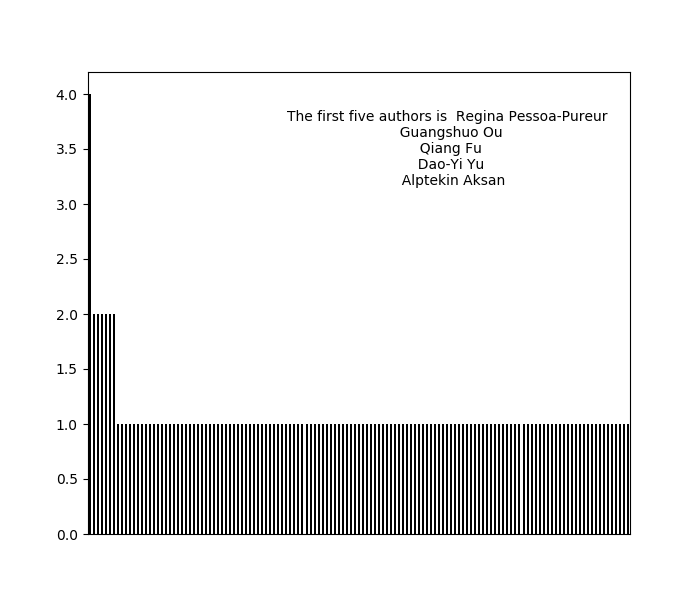

In [89]:
plt.figure(figsize = (7,6))
author_groupby = data_article.groupby('author')['journal'].count().sort_values(ascending = False)
author_groupby.plot(kind = 'bar', color = 'black', sharex = True)
first_five = 'The first five authors is {} \n {} \n {} \n {} \n {}'.format(author_groupby.index[0], author_groupby.index[1],
                                                                         author_groupby.index[2], author_groupby.index[3], author_groupby.index[4])
plt.text(90, 3.5, first_five, ha = 'center', va = 'center')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

In [38]:
data_article.groupby('author')['journal'].count().idxmax() # the author having the max num of articles

' Regina Pessoa-Pureur '

<IPython.core.display.Javascript object>


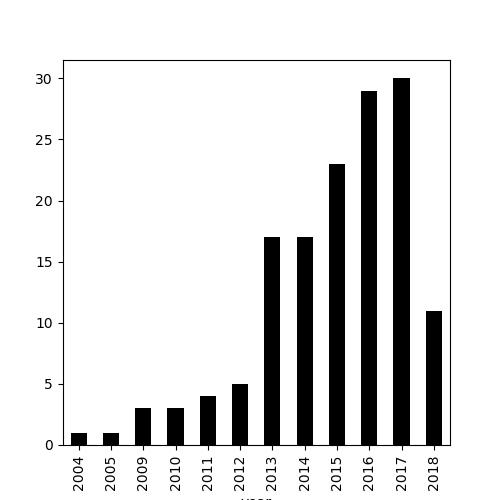

In [88]:
plt.figure(figsize = (5,5))
data_article.groupby('year')['author'].count().plot(kind = 'bar', color = 'black')


In [31]:
data_article.head()

,Unnamed: 0,article_name,article_type,author,journal,time,key_words,year
4,4,Effect of liquid helium vitrification on cytos...,Research article,Ying Hua Li,Animal Reproduction Science,December 2017,"[Effect, liquid, helium, vitrification, cytosk...",2017
7,7,HtrA3 is a cellular partner of cytoskeleton pr...,Research article,Barbara Lipinska,Journal of Proteomics,15 April 2018,"[HtrA3, partner, cytoskeleton, proteins, TCP1α...",2018
12,12,Why do peroxisomes associate with the cytoskel...,Open archive,Wolfgang Schliebs,Biochimica et Biophysica Acta (BBA) - Molecula...,May 2016,"[peroxisomes, cytoskeleton]",2016
15,15,Ultrasound induced strain cytoskeleton rearran...,Research article,Ali Tamayol,Journal of Biomechanics,26 July 2017,"[Ultrasound, rearrangement, simulation, study]",2017
19,19,EGFR/EGFRvIII remodels the cytoskeleton via ep...,Research article,Chun-Sheng Kang,Cancer Letters,10 September 2017,"[EGFR/EGFRvIII, cytoskeleton, silencing, AJAP1...",2017


In [122]:
t = lambda x: TextBlob(x).noun_phrases
data_article['key_words'] = data_article['article_name'].map(t)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
data_article.head()

,Unnamed: 0,article_name,article_type,author,journal,time,year,key_words
4,4,Effect of liquid helium vitrification on cytos...,Research article,Ying Hua Li,Animal Reproduction Science,December 2017,2017,"[effect, liquid helium vitrification, immature..."
7,7,HtrA3 is a cellular partner of cytoskeleton pr...,Research article,Barbara Lipinska,Journal of Proteomics,15 April 2018,2018,"[htra3, cellular partner, cytoskeleton protein..."
12,12,Why do peroxisomes associate with the cytoskel...,Open archive,Wolfgang Schliebs,Biochimica et Biophysica Acta (BBA) - Molecula...,May 2016,2016,[]
15,15,Ultrasound induced strain cytoskeleton rearran...,Research article,Ali Tamayol,Journal of Biomechanics,26 July 2017,2017,"[ultrasound, strain cytoskeleton rearrangement..."
19,19,EGFR/EGFRvIII remodels the cytoskeleton via ep...,Research article,Chun-Sheng Kang,Cancer Letters,10 September 2017,2017,"[egfr/egfrviii, ajap1, glioma cells]"


In [14]:
c1 = apriori.createC1(key_words_list)
print c1[:3]

[frozenset([u'-dependent']), frozenset([u'-membrane']), frozenset([u'/membrane'])]


In [16]:
D = map(set, key_words_list)

In [17]:
L1, suppData0 = apriori.scanD(D, c1, 0.02)

In [18]:
suppData0

{frozenset({u'raf-1/ck2'}): 0.006944444444444444,
 frozenset({u'interaction'}): 0.05555555555555555,
 frozenset({u'host'}): 0.013888888888888888,
 frozenset({u'difficile'}): 0.006944444444444444,
 frozenset({u'modulation'}): 0.013888888888888888,
 frozenset({u'shrimp'}): 0.006944444444444444,
 frozenset({u'observation'}): 0.013888888888888888,
 frozenset({u'endophilin'}): 0.006944444444444444,
 frozenset({u'silencing'}): 0.006944444444444444,
 frozenset({u'evolution'}): 0.006944444444444444,
 frozenset({u'sensitivity'}): 0.006944444444444444,
 frozenset({u'quality'}): 0.006944444444444444,
 frozenset({u'sp'}): 0.006944444444444444,
 frozenset({u'immature'}): 0.006944444444444444,
 frozenset({u'network'}): 0.013888888888888888,
 frozenset({u'neocortical'}): 0.006944444444444444,
 frozenset({u'remodeling'}): 0.027777777777777776,
 frozenset({u'cpg2'}): 0.006944444444444444,
 frozenset({u'biosensor'}): 0.006944444444444444,
 frozenset({u'maintenance'}): 0.013888888888888888,
 frozenset({u

In [19]:
c2 = apriori.aprioriGen(L1, 2)
L2, sup2 = apriori.scanD(D, c2, 0.06)

In [20]:
sup2

{frozenset({u'cell', u'integrity'}): 0.006944444444444444,
 frozenset({u'activation', u'regulation'}): 0.006944444444444444,
 frozenset({u'mechanism', u'neuron'}): 0.006944444444444444,
 frozenset({u'activation', u'receptor'}): 0.013888888888888888,
 frozenset({u'dynamic', u'interaction'}): 0.013888888888888888,
 frozenset({u'cell', u'organization'}): 0.006944444444444444,
 frozenset({u'dynamic', u'membrane'}): 0.020833333333333332,
 frozenset({u'cytoskeleton', u'gene'}): 0.041666666666666664,
 frozenset({u'alteration', u'cytoskeleton'}): 0.020833333333333332,
 frozenset({u'formation', u'protein'}): 0.006944444444444444,
 frozenset({u'cancer', u'migration'}): 0.006944444444444444,
 frozenset({u'a549', u'change'}): 0.006944444444444444,
 frozenset({u'formation', u'receptor'}): 0.013888888888888888,
 frozenset({u'link', u'state'}): 0.006944444444444444,
 frozenset({u'b', u'oocyte'}): 0.006944444444444444,
 frozenset({u'adhesion', u'cancer'}): 0.006944444444444444,
 frozenset({u'developme

In [20]:
list_frozenset = map(list, sup2.keys())

In [21]:
n = len(list_frozenset)
df = pd.DataFrame()
df['int1'] = [list_frozenset[i][0] for i in range(n)]
df['int2'] = [list_frozenset[i][1] for i in range(n)]
df['weight'] = sup2.values()
df

,int1,int2,weight
0,cell,integrity,0.006944
1,activation,regulation,0.006944
2,neuron,mechanism,0.006944
3,activation,receptor,0.013889
4,interaction,dynamic,0.013889
5,cell,organization,0.006944
6,dynamic,membrane,0.020833
7,cytoskeleton,gene,0.041667
8,cytoskeleton,alteration,0.020833
9,protein,formation,0.006944


In [33]:
df['norm'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())
df

,int1,int2,weight,norm
0,cell,integrity,0.006944,0.000000
1,activation,regulation,0.006944,0.000000
2,neuron,mechanism,0.006944,0.000000
3,activation,receptor,0.013889,0.028571
4,interaction,dynamic,0.013889,0.028571
5,cell,organization,0.006944,0.000000
6,dynamic,membrane,0.020833,0.057143
7,cytoskeleton,gene,0.041667,0.142857
8,cytoskeleton,alteration,0.020833,0.057143
9,protein,formation,0.006944,0.000000


In [34]:
G_df = nx.from_pandas_edgelist(df, 'int1', 'int2', ['norm'])
G_df.edges(data = True)

EdgeDataView([(u'mechanosensitivity', u'reorganization', {'norm': 0.02857142857142857}), (u'mechanosensitivity', u'osteoblast', {'norm': 0.02857142857142857}), (u'mechanosensitivity', u'inhibition', {'norm': 0.02857142857142857}), (u'mechanosensitivity', u'actin', {'norm': 0.02857142857142857}), (u'mechanosensitivity', u'mechanism', {'norm': 0.0}), (u'mechanosensitivity', u'cytoskeleton', {'norm': 0.02857142857142857}), (u'mechanosensitivity', u'gene', {'norm': 0.02857142857142857}), (u'function', u'disruption', {'norm': 0.0}), (u'function', u'cytoskeleton', {'norm': 0.05714285714285714}), (u'function', u'expression', {'norm': 0.0}), (u'function', u'protein', {'norm': 0.0}), (u'function', u'exposure', {'norm': 0.0}), (u'cancer', u'f-actin', {'norm': 0.0}), (u'cancer', u'effect', {'norm': 0.02857142857142857}), (u'cancer', u'mechanism', {'norm': 0.0}), (u'cancer', u'cell', {'norm': 0.1142857142857143}), (u'cancer', u'adhesion', {'norm': 0.0}), (u'cancer', u'inhibition', {'norm': 0.0}), 

<IPython.core.display.Javascript object>


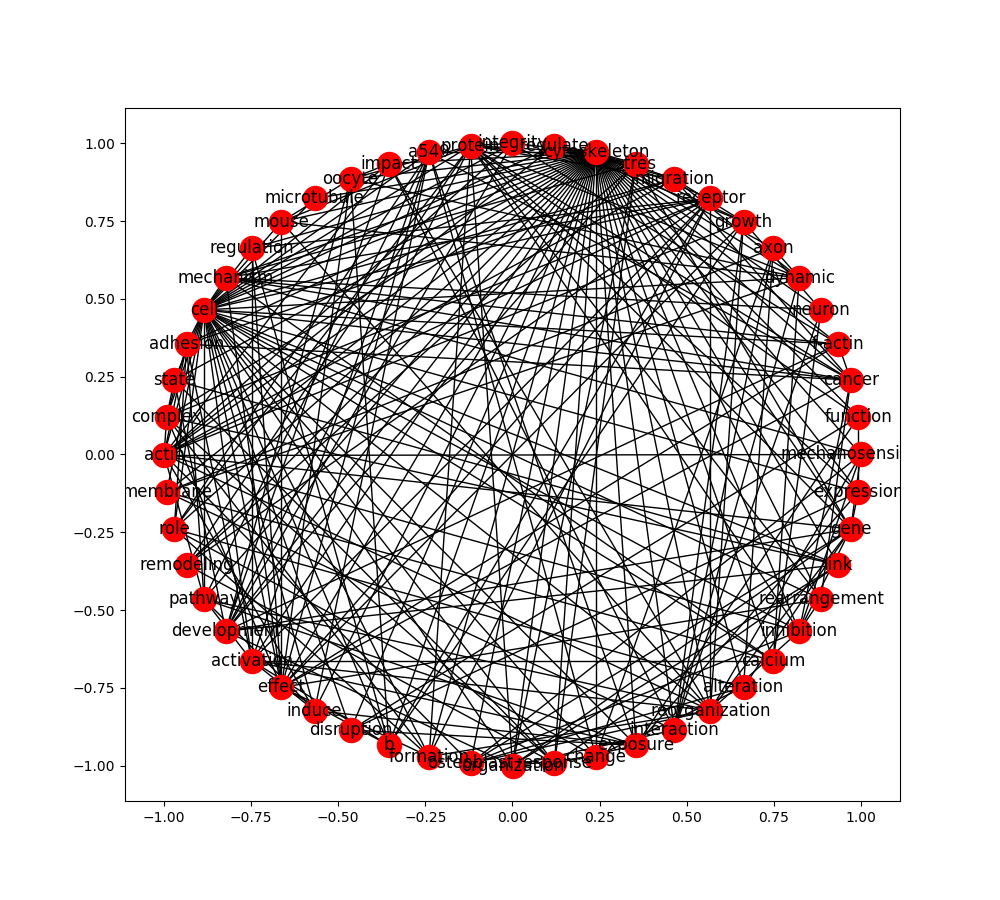

In [30]:
plt.figure(figsize = (10, 9))
pos = nx.circular_layout(G_df)
nx.draw_networkx(G_df, pos)

<IPython.core.display.Javascript object>


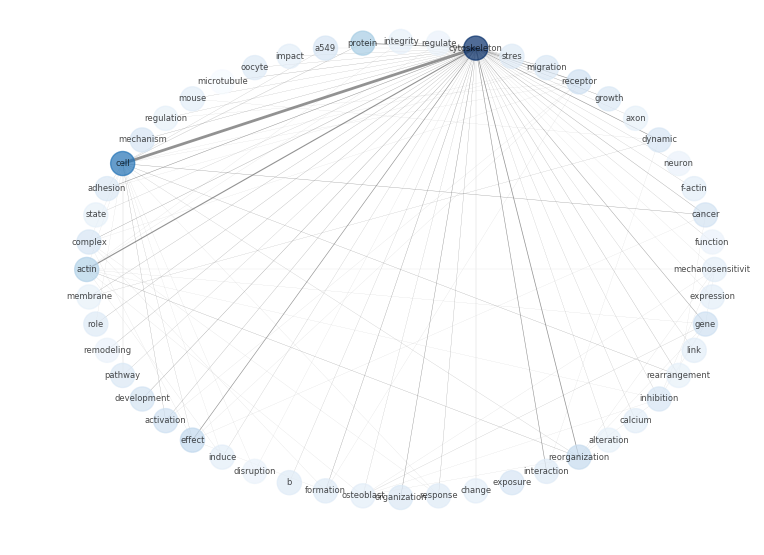

In [91]:
plt.figure(figsize = (10, 7))
node_color = [G_df.degree(v) for v in G_df]
edge_width = [2*G_df[u][v]['norm'] for u, v in G_df.edges()]
nx.draw_networkx(G_df, pos, node_color = node_color, alpha = 0.7, 
                width = edge_width, edge_color = '0.4', cmap = plt.cm.Blues,
                font_size = 6, 
                label = 'the network of key words')
ax0 = plt.axes()
#ax0.patch.set_facecolor('white')
plt.axis('off')
plt.tight_layout()
plt.savefig('network_key_words.png', dpi = 300)

In [72]:
L, suppData = apriori.apriori(key_words_list, minSupport = 0.02)
L

[[frozenset({u'neuron'}),
  frozenset({u'pathway'}),
  frozenset({u'complex'}),
  frozenset({u'gene'}),
  frozenset({u'a549'}),
  frozenset({u'organization'}),
  frozenset({u'impact'}),
  frozenset({u'disruption'}),
  frozenset({u'induce'}),
  frozenset({u'expression'}),
  frozenset({u'inhibition'}),
  frozenset({u'migration'}),
  frozenset({u'receptor'}),
  frozenset({u'adhesion'}),
  frozenset({u'b'}),
  frozenset({u'cancer'}),
  frozenset({u'activation'}),
  frozenset({u'integrity'}),
  frozenset({u'f-actin'}),
  frozenset({u'regulation'}),
  frozenset({u'development'}),
  frozenset({u'exposure'}),
  frozenset({u'growth'}),
  frozenset({u'stres'}),
  frozenset({u'membrane'}),
  frozenset({u'osteoblast'}),
  frozenset({u'state'}),
  frozenset({u'mechanism'}),
  frozenset({u'actin'}),
  frozenset({u'reorganization'}),
  frozenset({u'cytoskeleton'}),
  frozenset({u'cell'}),
  frozenset({u'mechanosensitivity'}),
  frozenset({u'change'}),
  frozenset({u'dynamic'}),
  frozenset({u'microtu

In [73]:
L[1]

[frozenset({u'cytoskeleton', u'effect'}),
 frozenset({u'cytoskeleton', u'formation'}),
 frozenset({u'cytoskeleton', u'mouse'}),
 frozenset({u'cell', u'reorganization'}),
 frozenset({u'cell', u'effect'}),
 frozenset({u'cytoskeleton', u'role'}),
 frozenset({u'actin', u'reorganization'}),
 frozenset({u'complex', u'cytoskeleton'}),
 frozenset({u'cell', u'protein'}),
 frozenset({u'b', u'cytoskeleton'}),
 frozenset({u'cytoskeleton', u'f-actin'}),
 frozenset({u'a549', u'cell'}),
 frozenset({u'cytoskeleton', u'function'}),
 frozenset({u'cytoskeleton', u'link'}),
 frozenset({u'cytoskeleton', u'oocyte'}),
 frozenset({u'cytoskeleton', u'induce'}),
 frozenset({u'gene', u'osteoblast'}),
 frozenset({u'cytoskeleton', u'integrity'}),
 frozenset({u'cytoskeleton', u'migration'}),
 frozenset({u'adhesion', u'cytoskeleton'}),
 frozenset({u'cell', u'cytoskeleton'}),
 frozenset({u'adhesion', u'cell'}),
 frozenset({u'cancer', u'cytoskeleton'}),
 frozenset({u'axon', u'cytoskeleton'}),
 frozenset({u'cytoskeleto

In [79]:
suppData

{frozenset({u'cell', u'integrity'}): 0.006944444444444444,
 frozenset({u'raf-1/ck2'}): 0.006944444444444444,
 frozenset({u'interaction'}): 0.05555555555555555,
 frozenset({u'host'}): 0.013888888888888888,
 frozenset({u'difficile'}): 0.006944444444444444,
 frozenset({u'modulation'}): 0.013888888888888888,
 frozenset({u'shrimp'}): 0.006944444444444444,
 frozenset({u'observation'}): 0.013888888888888888,
 frozenset({u'formation', u'protein'}): 0.006944444444444444,
 frozenset({u'endophilin'}): 0.006944444444444444,
 frozenset({u'silencing'}): 0.006944444444444444,
 frozenset({u'evolution'}): 0.006944444444444444,
 frozenset({u'cytoskeleton', u'migration', u'protein'}): 0.006944444444444444,
 frozenset({u'sensitivity'}): 0.006944444444444444,
 frozenset({u'adhesion', u'cancer'}): 0.006944444444444444,
 frozenset({u'quality'}): 0.006944444444444444,
 frozenset({u'sp'}): 0.006944444444444444,
 frozenset({u'migration', u'protein'}): 0.006944444444444444,
 frozenset({u'immature'}): 0.006944444

In [46]:
article_name_list = data_article['article_name'].tolist()
print article_name_list[0:3]

[u'Effect of liquid helium vitrification on cytoskeleton of immature cattle oocytes', u'HtrA3 is a cellular partner of cytoskeleton proteins and TCP1\u03b1 chaperonin', u'Why do peroxisomes associate with the cytoskeleton ?']


In [47]:
article_name_string = data_article['article_name'].to_string()
print article_name_string[:100]

4      Effect of liquid helium vitrification on cytos...
7      HtrA3 is a cellular partner of cytos


In [48]:
article_name_string = article_name_string.replace(':', ' ')

In [49]:
wordcloud = WordCloud(background_color = 'white', collocations = True).generate(article_name_string)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.savefig('cloud_title.png', dpi = 300)
